# Book reviews Data Analysis

This project is based off of the [Book-Crossing: User review ratings dataset](https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset), looking at 278,858 users (anonymized with demographic information), providig over 1m ratings about 271,379 books.

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Discovery 

The data comes in three separate CSVs; 
- Book data
- Book reviews data
- User data

I decided to conduct my research based on following, as that is what I was interested in: 
- **Books** 
- **Book Reviews** 

When I first encountered the data, I immediately ran into an encoding issue with the data, something I had never come across before. It was an easy fix, as seen below. 

During this stage, I also decided to merge the Books data with the Book reviews data

In [34]:
# merging books and ratings together
books = pd.read_csv('BX_Books.csv', sep=';', encoding='latin-1')
books_rating = pd.read_csv('BX-Book-Ratings.csv', sep=';', encoding='ISO-8859-1')

merged_books = pd.merge(books, books_rating, on='ISBN')
merged_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


## Data Cleansing

To my surprise, there was not much that needed to be done in order to cleanse this data. The very first thing I did was drop any duplicate rows from the dataset, but to my surpise, the data did not change, so there were no duplicates. 

In [35]:
merged_books.count()

ISBN                   1031175
Book-Title             1031175
Book-Author            1031173
Year-Of-Publication    1031175
Publisher              1031173
Image-URL-S            1031175
Image-URL-M            1031175
Image-URL-L            1031175
User-ID                1031175
Book-Rating            1031175
dtype: int64

In [36]:
merged_books.drop_duplicates()
merged_books.count()

ISBN                   1031175
Book-Title             1031175
Book-Author            1031173
Year-Of-Publication    1031175
Publisher              1031173
Image-URL-S            1031175
Image-URL-M            1031175
Image-URL-L            1031175
User-ID                1031175
Book-Rating            1031175
dtype: int64

I was also not interested in the image url data for this dataset, so I decided to drop that as well to make the data cleaner/easier to work with 

In [37]:
merged_books = merged_books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])
merged_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385,0


The next thing I did was look for any None/NaN values 

In [38]:
whats_missing = merged_books.loc[merged_books.isnull().any(axis=1)]
whats_missing

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
800162,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,63714,10
824230,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,98391,9
824539,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,98391,9
929125,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,98647,8


In this case there are 4 books with missing values, 2 where authors are missing and 2 where the Publisher are missing. From doing some external research, I was able to fill in the missing publisher information. I searched the book by ISBN number to get the accurate publisher

In [39]:
merged_books.loc[824230, 'Publisher'] = 'NovelBooks, Inc.'
merged_books.loc[824539, 'Publisher'] = 'CreateSpace Independent Publishing Platform'

### Rating Distrubution

After that, I decided to filter the books that have zero ratings, as you can see from the graph below, they take up a significant number of books that we are looking at and most platforms (that I know of) use a 1 or higher rating scale

<Axes: xlabel='Book Rating', ylabel='Count'>

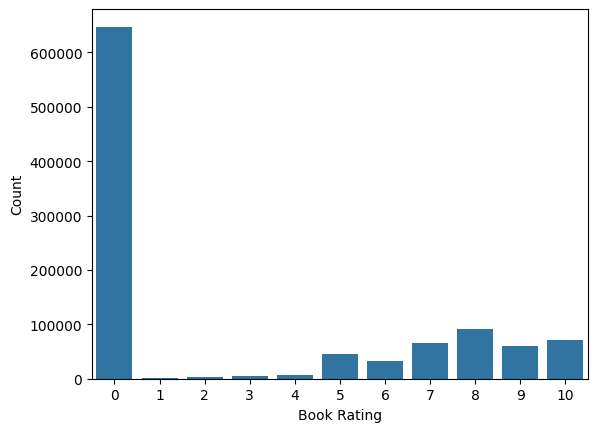

In [40]:
count_ratings = merged_books.groupby(['Book-Rating']).size()

count_bar = sns.barplot(count_ratings)
count_bar.set_xlabel('Book Rating')
count_bar.set_ylabel('Count')
count_bar


<Axes: xlabel='Book Rating', ylabel='Count'>

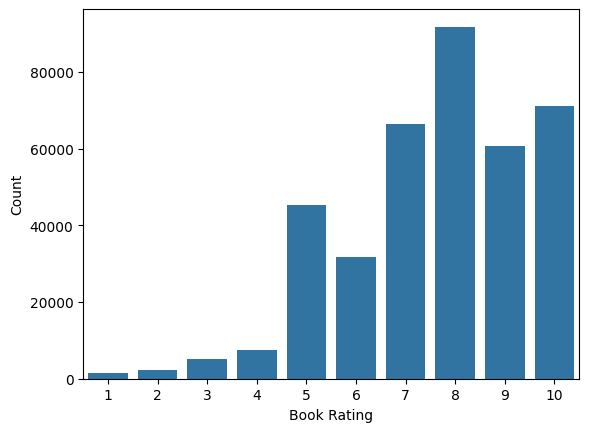

In [43]:
merged_books = merged_books[merged_books['Book-Rating'] != 0]
count_ratings = merged_books.groupby(['Book-Rating']).size()
count_bar = sns.barplot(count_ratings)
count_bar.set_xlabel('Book Rating')
count_bar.set_ylabel('Count')
count_bar

### Data Cleansing - Summary

This data was very clean. There were no duplicates found and only 4 had missing values. I was able to update some of the values that were missing and came across a surprising realization that some books had no known authors, perhaps due to it being written collaboratively, but otherwise, unknown.

## Report 

### Publlishing Years

So what were the most popular publishing years? To do this, I decided to look at the top 20 publishing years by doing the following:

In [66]:
pub_years_count = merged_books.value_counts('Year-Of-Publication').reset_index(name='Count')
pub_years_count = pub_years_count.nlargest(20, 'Count')
pub_years_count = pub_years_count.sort_values(by='Year-Of-Publication', ascending=False)

Text(0, 0.5, 'Year of Publication')

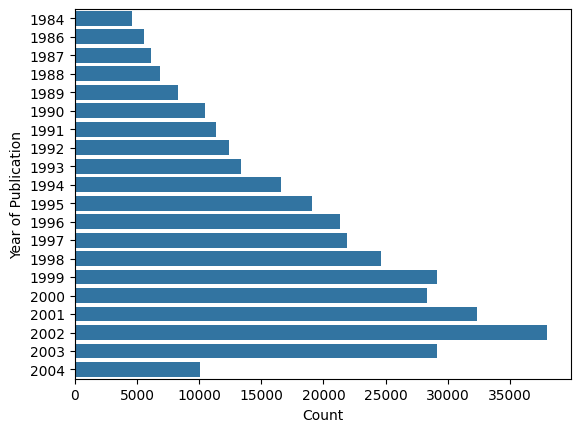

In [87]:
pub_bar = sns.barplot(pub_years_count, x='Count', y='Year-Of-Publication', orient='y')
pub_bar.set_ylabel('Year of Publication')

As you can see in the barchart above, 2002 was the most popular publishing year

### Top Rated Books

#### Top 10 with 10 Star Ratings

Just out of curiosity, I was interested to see what books had the most 10 star ratings, as they must be very popular books. I was not at all surprised to see 5/7 Harry Potter books making the top 10 of 10 list, (especially since, when I looked at the user data not included in this report, the average reader age was 34 years old). 

In [78]:
top_10_rated = merged_books[merged_books['Book-Rating'] == 10]
top_books_count = top_10_rated['Book-Title'].value_counts().reset_index(name='Count')

top_books_count.head(10)

,Book-Title,Count
0,The Da Vinci Code,160
1,Harry Potter and the Sorcerer's Stone (Harry P...,152
2,Harry Potter and the Prisoner of Azkaban (Book 3),150
3,The Lovely Bones: A Novel,148
4,Harry Potter and the Chamber of Secrets (Book 2),139
5,Harry Potter and the Goblet of Fire (Book 4),136
6,To Kill a Mockingbird,133
7,Harry Potter and the Order of the Phoenix (Boo...,115
8,The Secret Life of Bees,112
9,The Fellowship of the Ring (The Lord of the Ri...,103


#### Top 10 with 8-10 Star Ratings

Now let's look at the books with the most ratings between 8 and 10

Text(0, 0.5, 'Book Title')

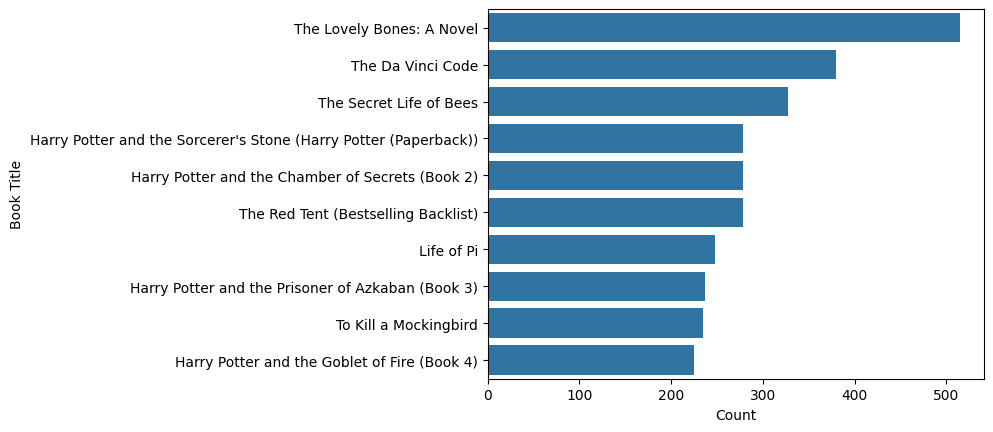

In [89]:
top_rated_general = merged_books[(merged_books['Book-Rating'] >= 8) & (merged_books['Book-Rating'] <= 10)]
top_rated_books_count = top_rated_general['Book-Title'].value_counts().reset_index(name='Count')
top_rated_books_count = top_rated_books_count.head(10)

top_bar = sns.barplot(top_rated_books_count, y='Book-Title', x='Count')
top_bar.set_ylabel('Book Title')

The Harry Potter books are still holding strong, however _The Lovely Bones: A Novel_ is a clear winner here, with the most high ratings. The average rating for the this book was 8

In [72]:
lovely_bones = merged_books[merged_books['Book-Title'] == 'The Lovely Bones: A Novel']
lovely_bones_average = lovely_bones['Book-Rating'].mean()
lovely_bones_average

np.float64(8.185289957567186)

Now let's look at the books with the lowest ratings

In [92]:
lowest_rated_general = merged_books[(merged_books['Book-Rating'] <= 3)]
lowest_rated_books_count = lowest_rated_general['Book-Title'].value_counts().reset_index()
lowest_rated_books_count = lowest_rated_books_count.head(10)
lowest_rated_books_count

,Book-Title,count
0,Wild Animus,243
1,Isle of Dogs,22
2,The Catcher in the Rye,19
3,The Notebook,13
4,Who Moved My Cheese? An Amazing Way to Deal wi...,12
5,Four Blondes,12
6,A Heartbreaking Work of Staggering Genius,12
7,Hannibal,12
8,Dreamcatcher,11
9,The Lovely Bones: A Novel,11


### Avergage Ratings for Highest Rating Count

Lastly, let's look at the average rating for the books with the highest rating counts and their year of publication

In [79]:
avg_ratings_by_year = merged_books.groupby('Year-Of-Publication').agg(
    avg = ('Book-Rating', 'mean'),
    count = ('Book-Rating', 'size')
    )
avg_sorted = avg_ratings_by_year.sort_values('count', ascending=False).head(10)
avg_sorted

,avg,count
Year-Of-Publication,,
2002,7.645949,37986
2001,7.613931,32331
2003,7.768155,29166
1999,7.561375,29100
2000,7.554783,28321
1998,7.576244,24625
1997,7.578853,21857
1996,7.576097,21361
1995,7.533920,19104


Text(0, 0.5, 'Count')

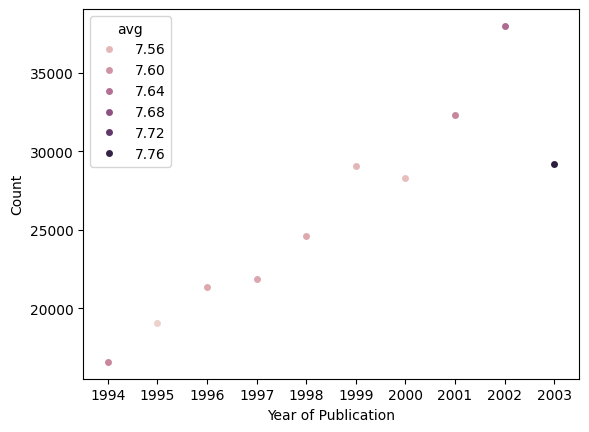

In [90]:
avg_plot = sns.stripplot(avg_sorted, x='Year-Of-Publication', y='count', hue='avg')
avg_plot.set_xlabel('Year of Publication')
avg_plot.set_ylabel('Count')